# Credit Card Fraud Detection

### Our objective is to predict if the unlabelled transaction is fraudulent or genuine by using two machine learning algorithms Kmeans ans Logistic Regression. Then we will perform model evaluation to identify which model performed better.

In [2]:
#importing required dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [6]:
#reading the csv file using pandas
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#checking the columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [7]:
#Preprocessing 
#standarising data 

In [8]:
feature = df.iloc[:,:-1]
target_column = df['Class']

In [9]:
from sklearn.preprocessing import scale
def feature_scale(data):
    X = scale(data)
    return X

processed_df = feature_scale(feature)
print (processed_df)

[[-1.99658302 -0.69424232 -0.04407492 ...  0.33089162 -0.06378115
   0.24496426]
 [-1.99658302  0.60849633  0.16117592 ... -0.02225568  0.04460752
  -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.6419735   0.98002374 -0.18243372 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.6419735  -0.12275539  0.32125034 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.64205773 -0.27233093 -0.11489898 ... -0.00598394  0.04134999
   0.51435531]]


# Dimensionality Reduction with PCA

In [10]:
def apply_PCA(data):
    from sklearn.decomposition  import PCA
    pca= PCA(n_components= 2)
    pca.fit(data)
    return pca
    

In [11]:
pca = apply_PCA(processed_df)
df_transformed = pca.transform(processed_df)

In [12]:
df_transformed.shape

(284807, 2)

# TRAIN TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(df_transformed, target_column, test_size = 0.33, random_state=500)


# K means clustering

What's happening behing the scene?  
By looking at the objective, it's clear that we need to cluster the transaction as 'Legitimate' or 'Fraudulent'. We can use a technique called clustering to segment all of the transactions into two groups, Genuine and Fraud. While regression and other supervised machine learning techniques work well when we have a clear metric we want to optimize for and lots of pre-labelled data, we need to instead use unsupervised machine learning techniques to explore the structure within a data set that doesn't have a clear value to optimize.
There are multiple ways of clustering data but here we will focus on centroid based clustering. Centroid based clustering works well when the clusters resemble circles with centers (or centroids). The centroid represent the arithmetic mean of all of the data points in that cluster.

K means is a iterative algorithm where we calculate distance from each data point to their closest centroid and we do it till we reach convergence. Sclearn's K means package is performing three steps behind the hood :  
1. Assingment - Calculate Eucilidean distance between each transaction and both centroids. Assign each transaction to their closest centroid.
2. Optimisation
3. Updation

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 2, init='k-means++')
kmeans.fit(features_train,labels_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
prediction = kmeans.predict(features_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(labels_test,prediction))

             precision    recall  f1-score   support

          0       1.00      0.45      0.62     93821
          1       0.00      0.64      0.00       166

avg / total       1.00      0.45      0.62     93987



In [30]:
print(confusion_matrix(labels_test,prediction))


[[42504 51317]
 [   60   106]]


In [31]:
accuracy_score(labels_test, prediction)

0.45336057114281764

# Visualise

In [32]:
centroids = kmeans.cluster_centers_

In [33]:
c_map = (kmeans.labels_)
c_map

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df_transformed[:,0],df_transformed[:,1],c= kmeans.labels_, cmap= 'rainbow')
ax2.set_title("Original")
ax2.scatter(df_transformed[:,0],df_transformed[:,1])

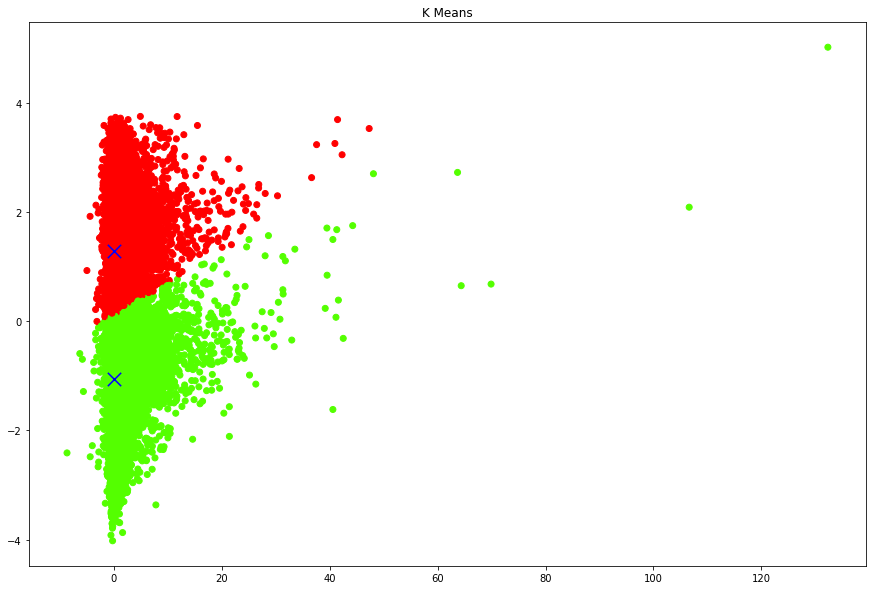

In [34]:
plt.figure(figsize=(15,10))
plt.scatter(x= features_train[:,0],y= features_train[:,1], c= kmeans.labels_, cmap= 'prism')
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', s=179, linewidths=5, color='b', zorder=10)
plt.title('K Means')
plt.show()

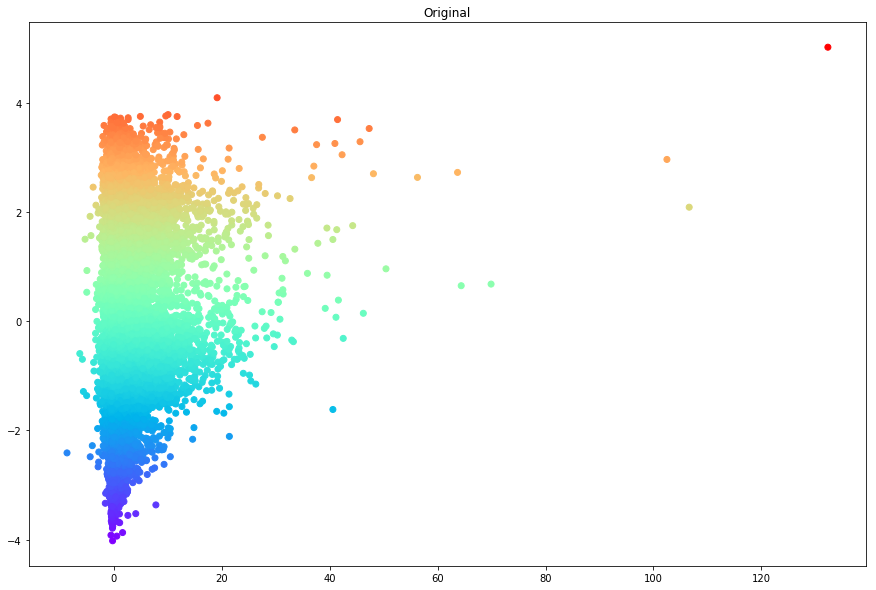

In [35]:

plt.figure(figsize=(15,10))
plt.scatter(x= df_transformed[:,0],y= df_transformed[:,1],c= df_transformed[:,1], cmap= 'rainbow')
plt.title('Original')
plt.show()

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression


In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(features_train, labels_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
log_prediction = lr.predict(features_test)

In [41]:
print(classification_report(labels_test,log_prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93821
          1       0.00      0.00      0.00       166

avg / total       1.00      1.00      1.00     93987



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
accuracy_score(labels_test, log_prediction)

0.998233798291253

In [43]:
print(confusion_matrix(labels_test,log_prediction))

[[93821     0]
 [  166     0]]
